# KNN Iris 이진분류 (Binary Classification)
---

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 준비

In [18]:
iris = pd.read_csv("iris.csv")
iris.shape

(150, 6)

In [34]:
iris.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [36]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [38]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [37]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [40]:
df['species'] = df['species'].map({
                    'Iris-setosa':0,
                    'Iris-versicolor':1,
                    'Iris-virginica':2})

# apply와 비슷, map은 컬럼 하나만 적용
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [48]:
## 방법 1
# col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# X = df[col]
# y = df['species']

## 방법2
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

## 방법3
X = df.drop(['species'], axis=1)
y = df['species']

In [49]:
X.shape, y.shape

((150, 4), (150,))

## 2. 테스트 데이터 분리

In [52]:
#!pip install scikit-learn --user

In [54]:
import sklearn

In [76]:
# 테스트 데이터 20%로 뽑기
## 방법 1
from sklearn.utils import shuffle

X, y = shuffle(X,y)
num = int(150*0.8)
X_train = X[:num] 
y_train = y[:num]
X_test = X[num:]
y_test = y[num:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

## 방법2

((120, 4), (30, 4), (120,), (30,))

## 3. 정규화
- min-max (이미지)
- standardzation (숫자)

![](https://blog.kakaocdn.net/dn/eb41Pu/btqBowKg4pk/HTKoxdu3KHUpVJnAXCyKX0/img.png)

In [84]:
X_train = (X_train - X_train.mean()) / X_train.std()
y_train = (y_train - y_train.mean()) / y_train.std()
X_train

,sepal_length,sepal_width,petal_length,petal_width
30,-1.208691,0.147840,-1.201243,-1.274044
128,0.718790,-0.552456,1.093213,1.212960
9,-1.088224,0.147840,-1.258605,-1.404939
110,0.839257,0.381272,0.806406,1.082065
92,-0.004016,-1.019320,0.175430,0.034905
...,...,...,...,...
3,-1.449626,0.147840,-1.258605,-1.274044
88,-0.244951,-0.085592,0.232792,0.165800
36,-0.365418,1.081568,-1.373327,-1.274044
87,0.598322,-1.719616,0.404876,0.165800


In [83]:
## 다른방법

# for col in X_train.columns:
#     mu = X_train[col].mean()
#     std = X_train[col].std()
#     X_train[col] = (X_train[col] - mu) / std

In [86]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,120.0,-2.488056e-15,1.0,-1.690561,-0.847288,-0.124483,0.628439,2.525803
sepal_width,120.0,-1.964401e-15,1.0,-2.419912,-0.552456,-0.085592,0.614704,2.715592
petal_length,120.0,1.420160e-16,1.0,-1.430689,-1.215584,0.290153,0.806406,1.724188
petal_width,120.0,6.003878e-16,1.0,-1.404939,-1.143149,0.165800,0.820275,1.736539


평균은 0, 표준편차는 1에 수렴

In [88]:
X_train = X_train.values
y_train = y_train.values

In [90]:
type(X_train)

numpy.ndarray

### 데이터 전처리 함수 만들기

In [168]:
import sklearn

def get_iris(mode=None):
    iris = pd.read_csv("iris.csv")
    df = iris.drop(['Id'], axis=1)
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    X = df[col]
    y = df['species']
    
    if (mode=='bin'):
        df = df.loc[df['species']!='Iris-virginica']
        df['species'] = df['species'].map({
                    'Iris-setosa':0,
                    'Iris-versicolor':1})
    else:
        df['species'] = df['species'].map({
                    'Iris-setosa':0,
                    'Iris-versicolor':1,
                    'Iris-virginica':2})
    
    X, y = shuffle(X,y)
    num = int(len(y)*0.8)
    X_train = X[:num] 
    y_train = y[:num]
    X_test = X[num:]
    y_test = y[num:]
    
    mu = X_train.mean()
    std = X_train.std()
    X_train = (X_train - mu) / std
    X_test = (X_test - mu) / std
    
    return X_train, X_test, y_train, y_test

In [170]:
X_train, X_test, y_train, y_test = get_iris('bin')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## 이진 데이터 준비
---

In [134]:
iris = pd.read_csv("iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [111]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [147]:
df = iris.drop('Id', axis=1)
df = df.loc[df['Species']!='Iris-virginica']

In [152]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
df['species'] = df['species'].map({
                    'Iris-setosa':0,
                    'Iris-versicolor':1})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,NaN
1,4.9,3.0,1.4,0.2,NaN
2,4.7,3.2,1.3,0.2,NaN
3,4.6,3.1,1.5,0.2,NaN
4,5.0,3.6,1.4,0.2,NaN
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,NaN
96,5.7,2.9,4.2,1.3,NaN
97,6.2,2.9,4.3,1.3,NaN
98,5.1,2.5,3.0,1.1,NaN


In [ ]:
for col in X_train.columns:
    mu = X_train[col].mean()
    std = X_train[col].std()
    X_train[col] = (X_train[col] - mu) / std
    X_test[col] = (X_test[col] - mu) / std

In [223]:
import sklearn

def get_iris(mode=None):
    iris = pd.read_csv("iris.csv")
    df = iris.drop(['Id'], axis=1)
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    
    if (mode=='bin'):
        df = df.loc[df['species']!='Iris-virginica']
        df['species'] = df['species'].map({
                    'Iris-setosa':0,
                    'Iris-versicolor':1})
    else:
        df['species'] = df['species'].map({
                    'Iris-setosa':0,
                    'Iris-versicolor':1,
                    'Iris-virginica':2})
        
    col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    X = df[col]
    y = df['species']
    
    X, y = shuffle(X,y, random_state=2022)
    num = int(len(y)*0.8)
    X_train = X[:num] 
    y_train = y[:num]
    X_test = X[num:]
    y_test = y[num:]
    
    mu = X_train.mean()
    std = X_train.std()
    X_train = (X_train - mu) / std
    X_test = (X_test - mu) / std
    
    return X_train, X_test, y_train, y_test

In [226]:
X_train, X_test, y_train, y_test = get_iris('bin')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 4), (20, 4), (80,), (20,))

In [227]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

## 4. 학습

In [187]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

## 5. 평가

In [188]:
# 테스트 평가
clf.score(X_test, y_test)

C:\Users\006\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [189]:
# 학습 평가
clf.score(X_train, y_train)

C:\Users\006\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [192]:
# 예측
y_pred = clf.predict(X_test)
y_pred

C:\Users\006\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [193]:
y_test

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [205]:
(y_pred == y_test).sum() / len(y_test)

1.0

In [211]:
## 평가지표 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred):

    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)

    print("accuracy:", acc)
    print("precision:", pre)
    print("recall:", rec)

In [212]:
print_score(y_test, y_pred)

accuracy: 1.0
precision: 1.0
recall: 1.0


### 혼동행렬 (Confusion Matrix)

In [214]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

array([[ 9,  0],
       [ 0, 11]], dtype=int64)

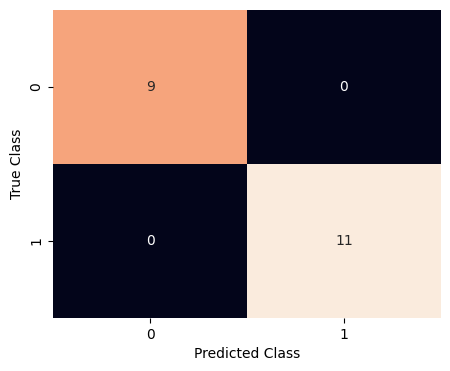

In [222]:
plt.figure(figsize=(5,4))
sns.heatmap(cfm, annot=True, cbar=False)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()